# Use case-3 : Predict Customer Sentiment 

<b>Below are the links to navigate to the relevant sections</b><br/>
### 1. <A href="#section1">Library import & reading data</A>
### 2. <A href="#section2">Exploratory Data Analysis</A>
### 3. <A href="#section3">Reading in an external data</A>
### 4. <A href="#section4">Data Preparation</A>
### 5. <A href="#section5">Training & Predicting Sentiment</A>
### 6. <A href="#section6">Identify Themes around Negative Data</A>
### 7. <A href="#section7">Conclusion</A>
### 8. <A href="#section8">Further Improvements/Iterations</A>

## <A name="section1"> Library import & reading data </A>

In [224]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import re
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
import nltk
import json
from sklearn.ensemble import RandomForestClassifier
from nltk import ngrams
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
stop_words = stopwords.words('english')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ritesh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [225]:
df = pd.read_csv("Usecase3_Dataset.csv")

In [226]:
df.head(5)

,airline_sentiment,airline,text
0,neutral,Virgin America,@VirginAmerica What @dhepburn said.
1,positive,Virgin America,@VirginAmerica plus you've added commercials t...
2,neutral,Virgin America,@VirginAmerica I didn't today... Must mean I n...
3,negative,Virgin America,@VirginAmerica it's really aggressive to blast...
4,negative,Virgin America,@VirginAmerica and it's a really big bad thing...


In [227]:
df.shape

(14640, 3)

## <A name="section2"> Exploratory Data Analysis</A>

In [228]:
#description of Data
df.describe()

,airline_sentiment,airline,text
count,14640,14640,14640
unique,3,6,14427
top,negative,United,@united thanks
freq,9178,3822,6


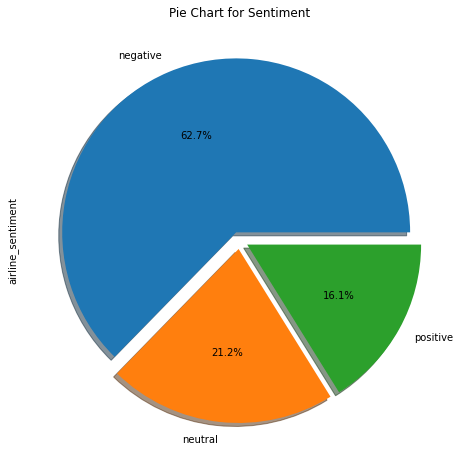

In [229]:
#Count of Sentiment 
df['airline_sentiment'].value_counts().plot.pie(explode=[0.05, 0.05,0.05], autopct='%1.1f%%', shadow=True, figsize=(8,8))
plt.title('Pie Chart for Sentiment')
plt.show()

We have mostly Negative Sentiment with 9,178 Negative Sentiments'

In [230]:
#Count of Airlines
df_group = df.groupby(['airline'])['airline'].count() #df_group.in

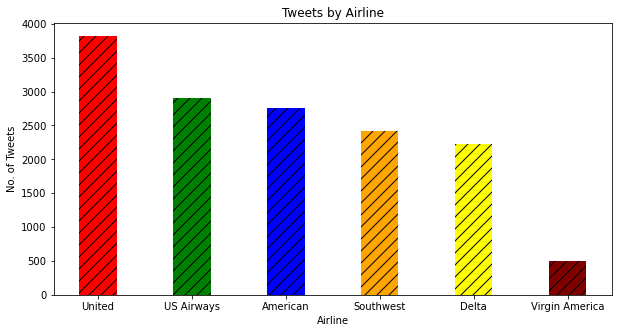

In [231]:
#plot for airlines
fig = plt.figure(figsize = (10, 5))
 
df_group = df.groupby(['airline'])['airline'].count().sort_values(ascending=False)

# creating the bar plot
plt.bar(df_group.index, df_group.values, hatch='//',color =['red','green','blue','orange','yellow','maroon'],width = 0.4)
 
plt.xlabel("Airline")
plt.ylabel("No. of Tweets")
plt.title("Tweets by Airline")
plt.show()

United has the maximum number of Tweets 3,822 or 26% of the total tweets made.

In [232]:
#Proportion of Sentiment by Airlines
grouped_df = df.groupby(['airline','airline_sentiment']).agg(Percent_Sentiment =('airline_sentiment',lambda x : x.count()))
percents_df = grouped_df.groupby(level=0).apply(lambda x: round(100 * x / float(x.sum()),2))
percents_df.sort_values(by=['Percent_Sentiment'],ascending=False)

Percent_Sentiment
airline        airline_sentiment                   
US Airways     negative                       77.69
American       negative                       71.04
United         negative                       68.89
Southwest      negative                       49.01
Delta          negative                       42.98
Virgin America negative                       35.91
               neutral                        33.93
Delta          neutral                        32.54
Virgin America positive                       30.16
Southwest      neutral                        27.44
Delta          positive                       24.48
Southwest      positive                       23.55
United         neutral                        18.24
American       neutral                        16.78
US Airways     neutral                        13.08
United         positive                       12.87
American       positive                       12.18
US Airways     positive                        9.23

US Airways has maximum Negative sentiment of 77.69%

In [233]:
stopwords = set(STOPWORDS)
stopwords.add("airline")
stopwords.add("airlines")
stopwords.add("now")
stopwords.add("amp")
stopwords.add("s")
stopwords.add("u")
stopwords.add("t")

In [234]:
#cleaning tweets for wordcloud
pattern = re.compile(r"@[a-zA-Z0-9]+") #@airline
df['clean_tweets'] = df['text'].apply(lambda x : pattern.sub(" ", x))

#special characters
special_char = re.compile(r"[^a-zA-Z0-9]")
df['clean_tweets'] = df['clean_tweets'].apply(lambda x : special_char.sub(" ", x))

#extra spaces
spaces = re.compile(r" +")
df['clean_tweets'] = df['clean_tweets'].apply(lambda x : spaces.sub(" ", x))

#punctuation mark
# initializing punctuations string
punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
df['clean_tweets'] = df['clean_tweets'].apply(lambda x: ' '.join(i for i in x.split() if i not in punc))

#stop words - 
df['clean_tweets'] = df['clean_tweets'].apply(lambda x: ' '.join(i for i in x.split() if i not in stopwords))

#lowercase
df['clean_tweets'] = df['clean_tweets'].str.lower()

In [235]:
df[['text','clean_tweets']].iloc[3,:]

text            @VirginAmerica it's really aggressive to blast...
clean_tweets    really aggressive blast obnoxious entertainmen...
Name: 3, dtype: object

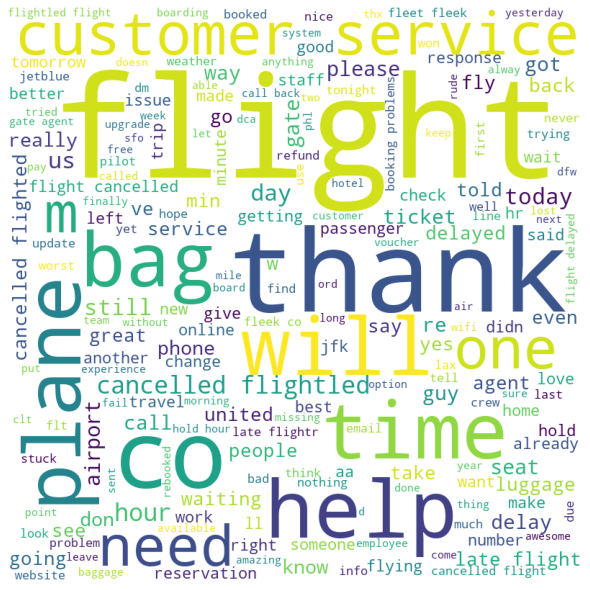

In [236]:
#Word cloud of Tweets
comment_words = ''
# iterate through clean tweets
for val in df.clean_tweets:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "


wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()


Thank, Help, Bag, Customer Service, Cancelled Flight are top keywords.

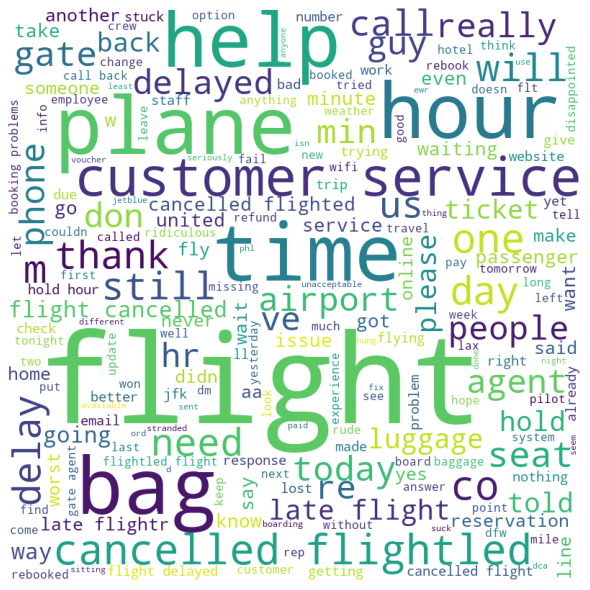

In [237]:
#Word cloud of Negative tweets
comment_words = ''

# iterate through clean negative tweets
for val in df[df['airline_sentiment'].isin(['negative'])].clean_tweets:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "


wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()


Some of the phrases that form part of Negative Sentiment are 'customer Service','cancelled flight', 'late/delayed flight', 'rude staff', 'baggage/luggage issue', 'booking problem', 'refund issue', 'weather'

### <A name="section3"> Reading in an external rank data for airlines and checking it in conjugation with Sentiment data </A>
source - https://data.world/datasets/airline

In [238]:
#read rank score data
df_rank = pd.read_csv("2018 Airline Rankings by AirHelp.csv")

In [247]:
#Airlines in Rank data
df_rank['Airline'].str.lower().unique()

array(['qatar airways', 'lufthansa', 'etihad airways',
       'singapore airlines', 'south african airways',
       'austrian airlines ag dba austrian', 'aegean airlines', 'qantas',
       'air malta', 'virgin atlantic', 'klm royal dutch airlines',
       'norwegian', 'wizz air', 'flybe', 'turkish airlines', 'emirates',
       'el al israel airlines', 'aer lingus', 'air dolomiti',
       'transavia.com', 'british airways', 'ethiopian airlines',
       'american airlines', 'kenya airways', 'luxair', 'aeromexico',
       'city jet', 'latam airlines', 'lot polish airlines', 'air europe',
       'eurowings', 'croatia airlines', 'swiss', 'air france',
       'china southern airlines', 'sas scandinavian airlines',
       'united airlines', 'oman air', 'ukraine international airlines',
       'air canada', 'westjet', 'air baltic corporation', 'finnair',
       'air transat atinc.', 'icelandair', 'garuda indonesia',
       'delta air lines', 'brussels airlines', 'tarom',
       'saudi arabian 

In [248]:
df_rank['Airline'] = df_rank['Airline'].str.lower()

In [249]:
#extracting relevant information
df_required = df_rank[df_rank['Country'].isin(["USA"])]
df_required.loc[:,'Airline'] = df_required['Airline'].map({'american airlines':'american','united airlines':'united', 'delta air lines':'delta'})
df_required

C:\Users\Ritesh\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,Rank,Airline,Country,Punctuality,Service Quality,Handling of passenger rights,AirHelp Score,Year
22,23,american,USA,7.8,6.3,9.5,7.84,2018
36,37,united,USA,7.9,6.0,8.9,7.59,2018
46,47,delta,USA,8.1,6.5,7.4,7.33,2018


In [250]:
#Merging the two dataframes (sentiment and rank data)
df['airline'] = df['airline'].str.lower()
df_merge = pd.merge(df,df_required, left_on='airline',right_on='Airline',how='inner' )

In [251]:
#% Sentiment in cojugation with rank data
grouped_df = df_merge.groupby(['airline','Rank','Punctuality','Service Quality','Handling of passenger rights','AirHelp Score','airline_sentiment']).agg(Percent_Sentiment =('airline_sentiment',lambda x : x.count()))
percents_df = grouped_df.groupby(level=0).apply(lambda x: round(100 * x / float(x.sum()),2))
percents_df.sort_values(by=['Percent_Sentiment'],ascending=False)

Percent_Sentiment
airline  Rank Punctuality Service Quality Handling of passenger rights AirHelp Score airline_sentiment                   
american 23   7.8         6.3             9.5                          7.84          negative                       71.04
united   37   7.9         6.0             8.9                          7.59          negative                       68.89
delta    47   8.1         6.5             7.4                          7.33          negative                       42.98
                                                                                     neutral                        32.54
                                                                                     positive                       24.48
united   37   7.9         6.0             8.9                          7.59          neutral                        18.24
american 23   7.8         6.3             9.5                          7.84          neutral                        16.78
united   37   7.9         6.0             8.9                          7.59          positive                       12.87
american 23   7.8         6.3             9.5                          7.84          positive                       12.18

Airline with High Punctuality & Service Quality score has least percent Negative Sentiment. Indicating Punctuality and Customer Service is the most important thing to influence Customer Sentiment.

## <A name="section4"> Data Preparation</A>

In [252]:
#cleaning - stop words removal (other steps already taken care above)
df['clean_tweets'] = df['clean_tweets'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [253]:
#tokenize and stem
def tokenize(text):
    tokens = word_tokenize(text)
    stems = []
    for item in tokens:
        stems.append(lemmatizer.lemmatize(item))
    return stems


#TF-IDF Vectorizer
tfidf = TfidfVectorizer(tokenizer=tokenize,  min_df=0.001,ngram_range=(1, 3))
tfidf_ = tfidf.fit_transform(df['clean_tweets'])

In [254]:
#converting tf-idf matrix to a dataframe to be used in training
X = pd.DataFrame(np.array(tfidf_.todense()),columns=tfidf.get_feature_names())
X.shape

(14640, 1605)

In [255]:
len(tfidf.get_feature_names()) #checking features by tf-idf

1605

In [256]:
#Saving Vocabulary
vocab = tfidf.vocabulary_
with open("vocab.json", "w") as outfile:
    json.dump(vocab, outfile)

In [257]:
df.columns

Index(['airline_sentiment', 'airline', 'text', 'clean_tweets'], dtype='object')

In [258]:
#Encode Sentiment
encode = {'negative':0,'neutral':1,'positive':2}
df['encode'] = df['airline_sentiment'].map(encode)

#save dictionary for prediction on unseen data
with open("encode.json", "w") as outfile:
    json.dump(encode, outfile)

In [259]:
#Train test split the data
X_train, X_test, y_train, y_test = train_test_split(X, df['encode'], test_size=0.20, random_state=42)

In [260]:
X_train

,0,000,1,1 2,1 2 hour,1 5,1 5 hour,1 hour,10,10 hour,...,yeah,year,year old,yep,yes,yes please,yesterday,yet,yr,zero
750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7598,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14124,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6187,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5191,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13418,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5390,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
860,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## <A name="section5"> Training & Predicting Sentiment</A>

### Naive Bayes

In [261]:
#Training - Multinomial Naive Bayes
clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB()

In [262]:
#Prediction on test data
y_pred = clf.predict(X_test)

In [263]:
#Classification report
print('\n*Classification Report:\n', classification_report(y_test, y_pred))


*Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.96      0.85      1889
           1       0.67      0.32      0.43       580
           2       0.84      0.49      0.62       459

    accuracy                           0.76      2928
   macro avg       0.76      0.59      0.63      2928
weighted avg       0.76      0.76      0.73      2928



### SVM 

In [264]:
#Training - SVM - rbf Kernel 
clf = SVC(kernel='rbf')
clf.fit(X_train, y_train) 

SVC()

In [265]:
#Prediction on test data
y_pred = clf.predict(X_test)

In [266]:
#Classification report
print('\n*Classification Report:\n', classification_report(y_test, y_pred))


*Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.94      0.87      1889
           1       0.68      0.43      0.52       580
           2       0.78      0.63      0.69       459

    accuracy                           0.79      2928
   macro avg       0.75      0.66      0.70      2928
weighted avg       0.78      0.79      0.77      2928



### RandomForest

In [267]:
#Training Ensemble - RF
clf = RandomForestClassifier()
clf.fit(X_train, y_train) 

RandomForestClassifier()

In [268]:
#Prediction on test data
y_pred = clf.predict(X_test)

In [269]:
#Classification report
print('\n*Classification Report:\n', classification_report(y_test, y_pred))


*Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.90      0.85      1889
           1       0.59      0.45      0.51       580
           2       0.72      0.59      0.64       459

    accuracy                           0.76      2928
   macro avg       0.71      0.65      0.67      2928
weighted avg       0.75      0.76      0.75      2928



## <A name="section6"> Identify Themes around Negative Data</A>

In [270]:
#cleaning tweets lemmatization
df['clean_tweets'] = df['clean_tweets'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))
#Extracting negative sentiment data
negative_df = df[df['airline_sentiment'].isin(['negative'])].reset_index()

In [271]:
## ngrams for negative sentiments
ngrams_list = []
for i in range(negative_df.shape[0]):
    split_list = negative_df.loc[i,'clean_tweets'].split()
    #bigram
    for j in ngrams(split_list,2):
        ngrams_list.append(j)
    #trigram
    for j in ngrams(split_list,3):
        ngrams_list.append(j)
    #quadgram
    for j in ngrams(split_list,4):
        ngrams_list.append(j)
    
ngrams_list = [' '.join(tups) for tups in ngrams_list]

In [272]:
ngrams_df = pd.DataFrame({'ngrams':ngrams_list})
ngrams_df.groupby(['ngrams'])['ngrams'].count().sort_values(ascending=False).head(50)

ngrams
customer service              457
cancelled flightled           448
late flight                   221
flight cancelled              212
cancelled flighted            204
2 hour                        165
late flightr                  145
cancelled flight              140
flight cancelled flightled    137
flightled flight              120
cancelled flightled flight    120
flight delayed                111
call back                     106
booking problem                98
gate agent                     88
5 hour                         83
3 hour                         81
hour late                      73
flight flight                  73
2 hr                           73
delayed flight                 71
4 hour                         69
flight attendant               64
please help                    61
cancelled flight flight        60
hour delay                     59
flight booking problem         57
flight booking                 57
wait time                      56
flight 

## <A name="section7"> Conclusion</A>

<b>Sentiment Analysis</b> - Classification model like SVM or Random forest can be used based on the resources available to predict Customer Sentiment. Further model can be improved and the Prediction can be rendered in real time using an API. 

<b>Themes around Negative Sentiment</b> - Customer Service Issue, Cancelled flight, Delayed flight, Booking problem, Lost baggage are some of the themes/reasons for Negative Sentiment

## <A name="section8"> Further Improvements/Iterations</A>

Below are some of the points to consider for further improvement in model.
1. Hyperparameter tuning using gridsearch etc.
2. Increasing dataset by adding more airlines across the world (if possible)
3. Using Deeplearning architecture like LSTM, Bert etc. 